## Question 1: On plots and regression planes
Use the imports-85.csv dataset available at BruinLearn (Week 1). The data are taken from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/index.php.

1. Use matplotlib to visualize the relationship between price and horsepower and body style. Price is the dependent variable. Consider both the "log()" and "^2" transformations of price as dependent variables. Does the body style variable appear to be relevant for car prices, above and beyond horsepower?

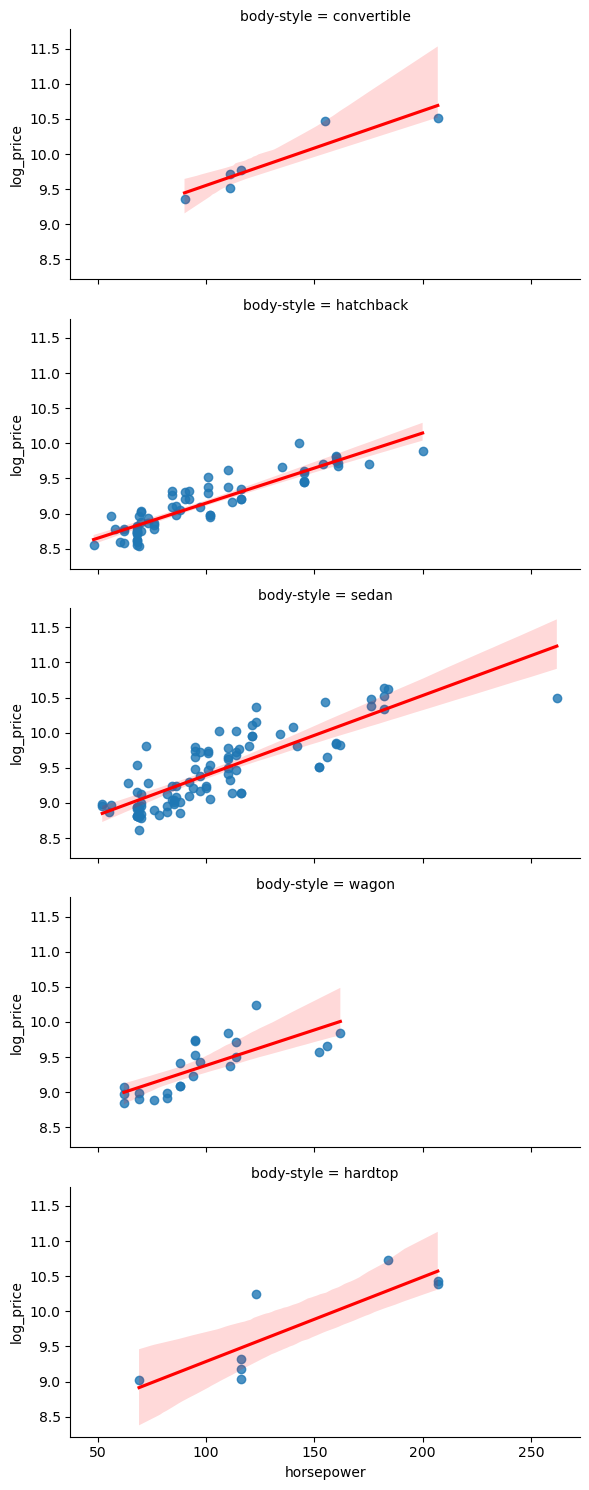

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir('/Users/yiyujie/Desktop/program/ML')
data = pd.read_csv('imports-85.csv',header = 0, sep = ',')
data['log_price'] = np.log(data['price'])
data['price^2'] = data['price']**2

ax = sns.FacetGrid(data,  row="body-style", height=3, aspect=2)
ax.map(sns.regplot, "horsepower", "log_price",line_kws={"color": "red"})
#ax.map(sns.scatterplot, "horsepower", "price")

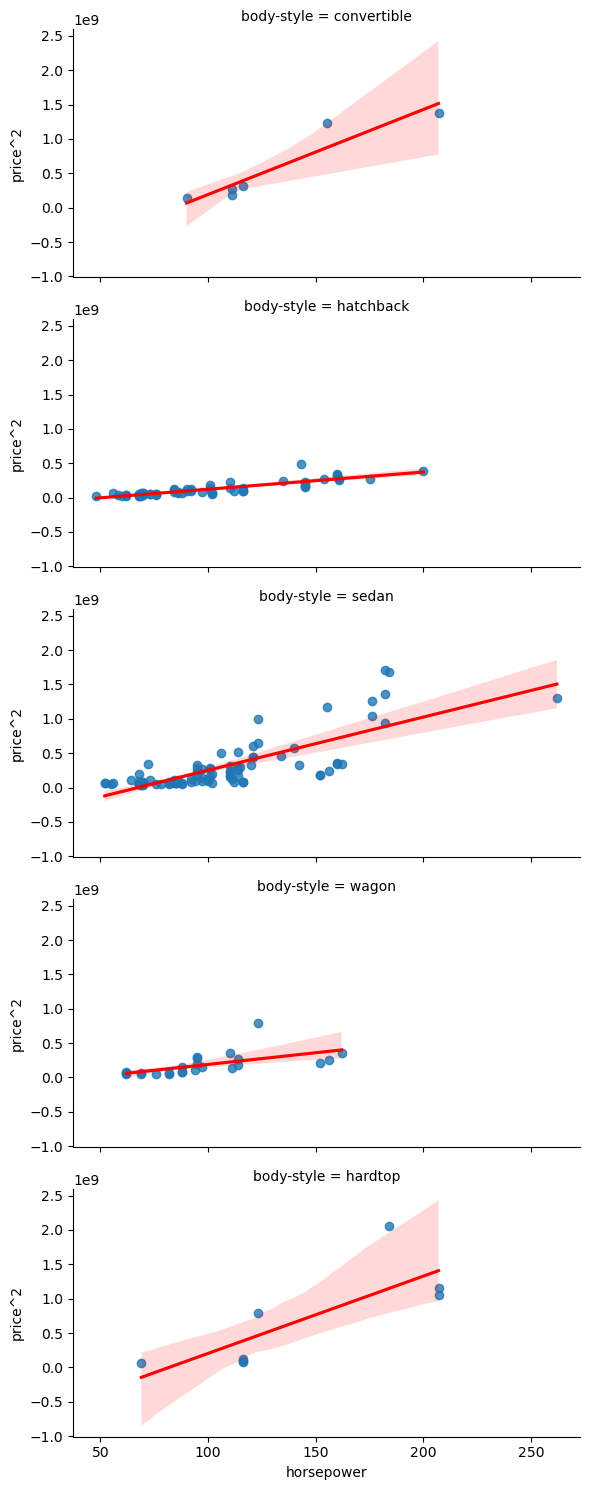

In [38]:
ax = sns.FacetGrid(data,  row="body-style", height=3, aspect=2)
ax.map(sns.regplot, "horsepower", "price^2",line_kws={"color": "red"})

* There are noticeable variations in the slope of the regression line across different body styles. So the body style variable appear to be relevant for car prices.

2. Run a regression of your preferred specification. Perform residual diagnostics as you learned in Econometrics. What do you conclude from your regression diagnostic plots
of residuals vs. fitted and residuals vs. horsepower? (Hint: You may want to use a
seaborn_qqplot and scipy.stats packages for qqplot)

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     115.9
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           3.55e-56
Time:                        13:15:36   Log-Likelihood:                -7.6882
No. Observations:                 199   AIC:                             27.38
Df Residuals:                     193   BIC:                             47.14
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

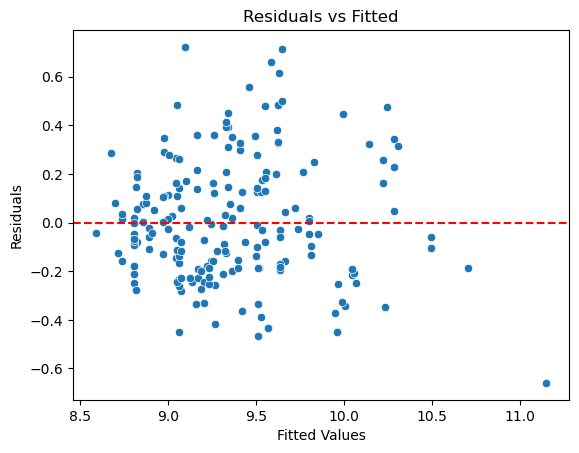

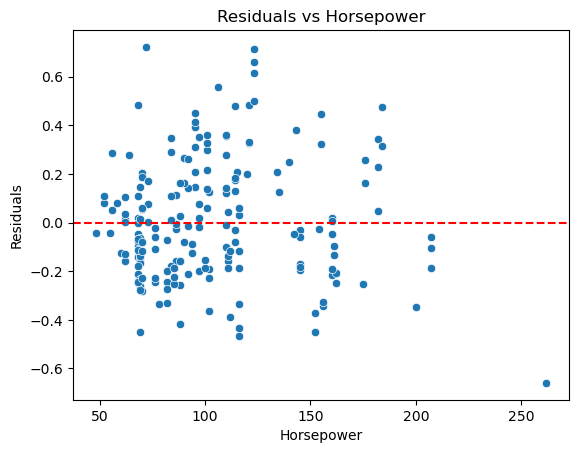

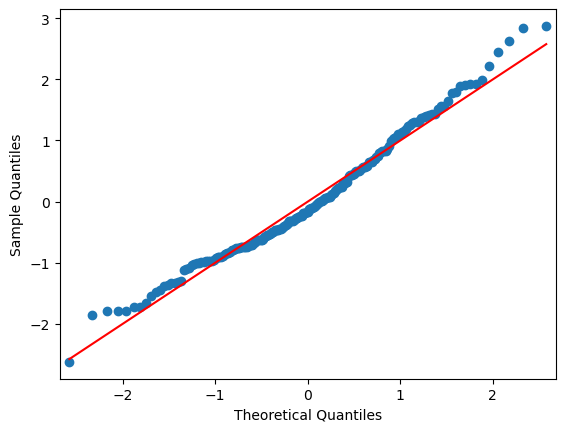

In [3]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

model = smf.ols('log_price ~ horsepower + C(Q("body-style"))', data=data).fit()
residuals = model.resid
fitted = model.fittedvalues
print(model.summary())

# Plot residuals vs fitted values
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

# Plot residuals vs horsepower
sns.scatterplot(x=data['horsepower'], y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Horsepower')
plt.ylabel('Residuals')
plt.title('Residuals vs Horsepower')
plt.show()

# qqplot
sm.qqplot(residuals, line='s', fit=True)
plt.show()

* There is no clear pattern or systematic structure in the residuals and no obvious pattern in how the residuals are distributed with respect to horsepower.
* In the Q-Q plot, most of the points lie on the reference line, suggesting that the residuals are normally distributed, which is an assumption of the OLS regression.

3. Now use matplotlib to visualize the relationship between fuel efficiency (city-mpg) and horsepower. Now regress city-mpg on horsepower. Is the regression result consistent with the conclusion you would draw based on the plot? More on this next week.
Note: Make sure that your continuous variables are in numeric form.

<Axes: xlabel='horsepower', ylabel='city-mpg'>

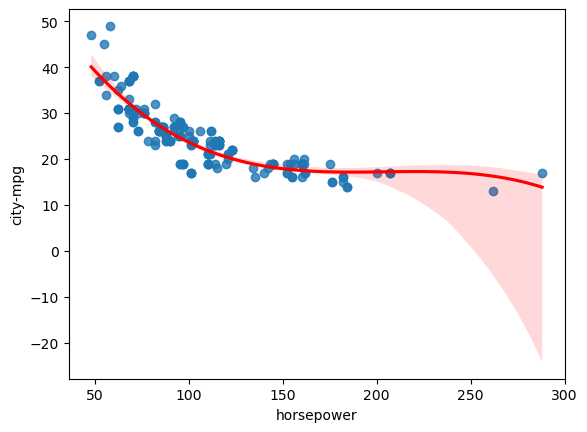

In [59]:
sns.regplot(x = 'horsepower',
            y = 'city-mpg',
            data = data,
           line_kws = {'color':'red'},
           fit_reg = True,
           order=3)

* Given the visible curve and the fit shown, the model appears to be more consistent with the data than a simple linear model would be.

Use the StockRetAcct_DT.csv dataset available at BruinLearn (Week 1) for the next two questions.
## Question 2 : Nonlinear relations
A common concern is that the relationship between a predictive variable (X) and the
outcome we are trying to predict (Y) is nonlinear. On the surface, this seems to invalidate linear regressions, such as the Fama-MacBeth regression. However, this is not generally the case. For instance, if Y = f(X) + noise, where f(.) is not linear in X, simply define a transformation of X as, generally, Z = a + bf(X). Now, it is clear that Y = a1 + b1*Z, for constants a, a1, b, and b1. In other words, one could include squared values of X in the regression, perhaps max(0,X), etc.

We will see this in action for the case of Issuance (lnIssue). This is the average amount of stock issuance in the last 36 months, normalized by market equity. Generally, firms that issue a lot of equity have low returns going forward.

a. Construct decile sorts (10 portfolios) as in the class notes, but now based on the
issuance variable lnIssue. Give the average return to each decile portfolio, value-weighting stocks within each portfolio each year, equal-weighting across years.

In [107]:
data2 = pd.read_csv('StockRetAcct_DT.csv',header = 0, sep = ',').drop('Unnamed: 0', axis=1)
# calculate decile within year
data2['decile'] = data2.groupby('year')['lnIssue'].transform(lambda x: pd.qcut(x, 10, labels=False))
print('Average return to each decile portfolio:')
print(data2.groupby('decile')['lnAnnRet'].mean())
print()
data2['value_weighted_return'] = data2['lnAnnRet'] * data2['MEwt']
annual_decile_returns = data2.groupby(['year', 'decile']).apply(
    lambda df: df['value_weighted_return'].sum() / df['MEwt'].sum())
print('Value-weighting stocks within each portfolio each year:')
print(annual_decile_returns)
print()
print('Equal-weighting across years:')
print(annual_decile_returns.groupby(level=1).mean())

Average return to each decile portfolio:
decile
0.0    0.098539
1.0    0.090092
2.0    0.073693
3.0    0.074752
4.0    0.065797
5.0    0.065848
6.0    0.050847
7.0    0.032575
8.0   -0.001782
9.0   -0.064073
Name: lnAnnRet, dtype: float64

Value-weighting stocks within each portfolio each year:
year  decile
1980  0.0       0.207005
      1.0       0.120294
      2.0       0.136876
      3.0       0.228157
      4.0       0.216326
                  ...   
2014  5.0      -0.056498
      6.0       0.040147
      7.0      -0.030796
      8.0       0.044925
      9.0       0.015104
Length: 350, dtype: float64

Equal-weighting across years:
decile
0.0    0.116770
1.0    0.088786
2.0    0.082079
3.0    0.090268
4.0    0.095334
5.0    0.068335
6.0    0.061141
7.0    0.035087
8.0    0.047079
9.0    0.002768
dtype: float64


/var/folders/l_/m6g3497s5j77bqb9jr7506tc0000gn/T/ipykernel_7309/469620870.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  annual_decile_returns = data2.groupby(['year', 'decile']).apply(


b. Plot the average return to these 10 portfolios, similar to what we did in the Topic 1(e-f) notes. Discuss whether the pattern seems linear or not.

<Axes: xlabel='decile', ylabel='avg_return'>

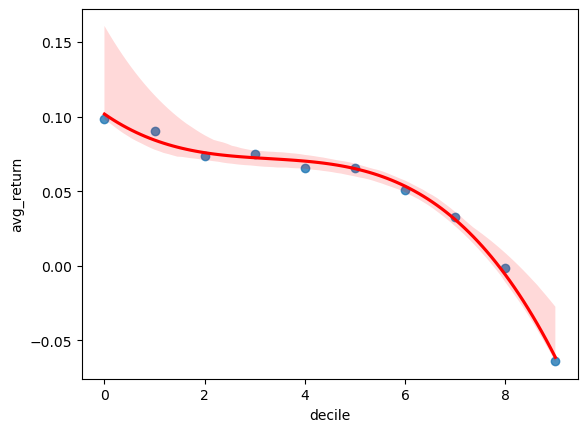

In [88]:
data3 = pd.DataFrame({'decile':range(10),
             'avg_return':data2.groupby('decile')['lnAnnRet'].mean()})
sns.regplot(x = 'decile',
            y = 'avg_return',
            data = data3,
           line_kws = {'color':'red'},
           fit_reg = True,
            order=3)

* The pattern does not seem linear, more likely to be a third-order polynomial.

c. Since most of the 'action' is in the extreme portfolios, consider a model where
expected returns to stocks is linear in a transformed issuance-characteristic that takes three values: -1 if the stock's issuance is in Decile 1, 1 if the stock's issuance is in decile 10, and 0 otherwise.

Create this transformed issuance variable and run a Fama-MacBeth regression with it.
Report the results. What is the nature of the portfolio implied by the Fama-MacBeth
regression? That is, what stocks do you go long, short, no position?

In [97]:
data2['trans_issuance'] = 0
data2.loc[data2['decile'] == 0, 'trans_issuance'] = -1
data2.loc[data2['decile'] == 9, 'trans_issuance'] = 1

In [102]:
coefficients = []
for period in data2['year'].unique():
    period_data = data2[data2['year'] == period]
    X = sm.add_constant(period_data['trans_issuance'])
    Y = period_data['lnAnnRet']
    model = sm.OLS(Y, X).fit()
    coefficients.append(model.params.iloc[1])

avg_coefficient = np.mean(coefficients)
std_error = np.std(coefficients) / np.sqrt(len(coefficients))
print(f"Average Coefficient for Transformed Issuance: {avg_coefficient}")
print(f"Standard Error: {std_error}")

Average Coefficient for Transformed Issuance: -0.07585306972893735
Standard Error: 0.014711758125034963


* Since the average coefficient is negative, we need to short on stocks in decile 10 and long on stocks in decile 1.

## Question 3 : Double‐sorts and functional forms
In the lecture notes we saw that the value spread is much larger for small stocks. Using this
fact, I proposed a model where expected returns are linear in the book-to-market ratio as
well as the interaction between book-to-market and size. In other words, holding size
constant there is a linear relation between expected stock returns and book-to-market.
In this question, we will dig deeper into whether this is a reasonable assumption or not
based on visual analysis.

a. Create independent quintile sorts based on book-to-market (lnBM) and size (lnME).
That is create a quintile variable by year for book-to-market and then create a quintile
variable by year for size.

In [111]:
data2['lnBM_quintile'] = data2.groupby('year')['lnBM'].transform(lambda x: pd.qcut(x, 5, labels=False))
data2['lnME_quintile'] = data2.groupby('year')['lnME'].transform(lambda x: pd.qcut(x, 5, labels=False))

b. For each size quintile, plot the average returns to the five book-to-market quintile
portfolios. So, for size quintile 1, and book-to-market quintile 3, the stocks in this
portfolio all have size quintile equal to 1 and book-to-market quintile equal to 3. Thus, I'm looking for five plots here, one for each size quintile.

Does the assumption of conditional linearity seem ok, or would you suggest a different
model?

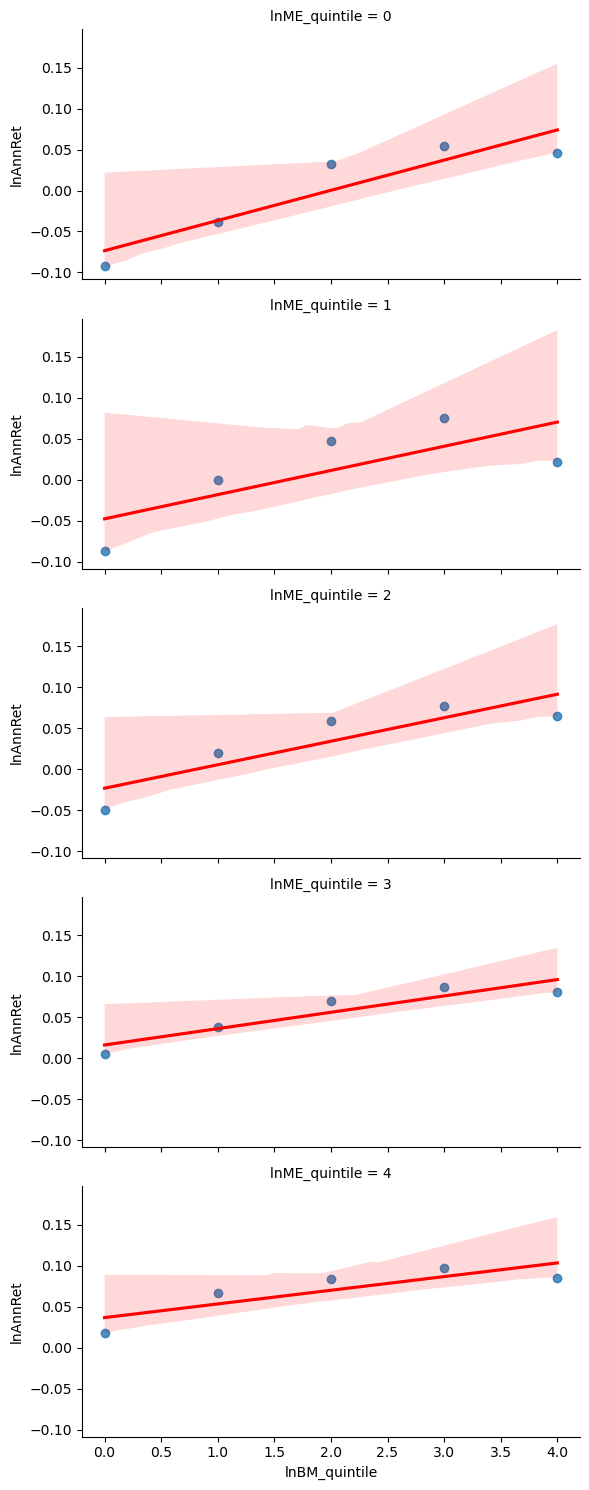

In [134]:
data4 = data2.groupby(['lnME_quintile','lnBM_quintile'])['lnAnnRet'].mean().reset_index()
ax = sns.FacetGrid(data4, row = 'lnME_quintile', height=3, aspect=2)
ax.map(sns.regplot, 'lnBM_quintile', 'lnAnnRet',line_kws={'color':'red'})

* **Linearity**: There appears to be a roughly linear relationship between book-to-market ratio and returns within each size quintile, as evidenced by the relatively straight fitted lines.
* **Spread**: The red shaded areas, which represent confidence intervals, seem wider for the smallest stocks (lnME_quintile = 0) and become narrower as size increases. This suggests that there is more uncertainty or variability in the returns for smaller stocks compared to larger ones, which is consistent with the value spread being larger for small stocks.
* **Consistency across Size Quintiles**: The slope of the relationship between book-to-market and returns looks similar across the size quintiles, suggesting that the linearity assumption holds regardless of the size.
* Given these observations, the assumption of conditional linearity between book-to-market and expected returns, while holding size constant, seems reasonable. 